# 3.2.2 Error estimation for interpolation polynomial
Approximate the logarithm function with a parabel at the points $x_1=1,x_2=2,x_3=4$ and caclulate the interpolated value of $\ln 3$. What is the error bound of the interpolation and how does it compare to the real error?

In [1]:
%run ../../tools/projini.py

from math import *
%matplotlib inline
from numpy import *
import matplotlib.pylab as pyl

In [2]:
# Given quantities
x = array([1.,2.,4.])
y = array([0., log(x[1]), log(x[2])])

## a) Interpolation polynomial

In [3]:
f_0 = y[0]; f_1 = y[1]; f_2 = y[2]

f_0_1 = (f_1 - f_0)/(x[1] - x[0])
f_1_2 = (f_2 - f_1)/(x[2] - x[1])

f_0_1_2 = (f_1_2 - f_0_1)/(x[2] - x[0])

In [4]:
print "Coefficients: ", f_0, f_0_1, f_0_1_2

Coefficients:  0.0 0.69314718056 -0.115524530093


The interpolation polynomial becomes therefore
$$LN(x) = 0.6931(x-1) - 0.1155(x-1)(x-2)$$

In [5]:
LN = lambda xi: f_0 + f_0_1*(xi-x[0]) + f_0_1_2*(xi-x[0])*(xi-x[1])

In [6]:
LN_3 = LN(3.)    # interpolated value
ln_3 = log(3.)   # real value
print "The interpolated value of x = 3 is LN(3) = %f" % (LN_3,)
print "The real         value of x = 3 is ln(3) = %f" % (ln_3,)

The interpolated value of x = 3 is LN(3) = 1.155245
The real         value of x = 3 is ln(3) = 1.098612


## Error analysis

### Actual error

In [7]:
print "Absolute error due to interpolation: %f" % (LN_3-ln_3,)
print "Relative error due to interpolation: %f" % ((LN_3-ln_3)/ln_3,)

Absolute error due to interpolation: 0.056633
Relative error due to interpolation: 0.051550


### Error limit

We use theorem 3.4 from <em>Numerical Analysis</em> by Sauer that specifies the error of the interpolation polynomial.
$$
f(x)-P(x)=\frac{(x-x_1)(x-x_2) \cdots (x-x_n)}{n!}f^{(n)}(c)
$$
where c is some number within the intervall given by the x-values of the interpolation points.

We get for $f(x) = \ln x$ with $(\ln x)'''=2x^{-3}$ the estimate
$$
\ln x - \mathrm{LN}(x) = \frac{(x-1)(x-2)(x-4)}{3!}\left [ 2x^{-3}\right ]
$$

The derivative has its maximum at $c=1$, and we get for the worst-case error
$$
\left | \ln x - \mathrm{LN}(x) \right | \le
  \frac{\left | (x-1)(x-2)(x-4) \right |}{3!} 2
$$


In [8]:
# Worst case error for x = 3
xi = 3.
Err_ln = 2.*abs((xi-x[0])*(xi-x[1])*(xi-x[2]))/(1.*2.*3.)

In [9]:
print "Limit of the absolute error E_a = %f" % (Err_ln,)

Limit of the absolute error E_a = 0.666667


The limit of the absolute error $E_a = 0.667$ is larger than the actual error $e_a = 0.057$ as expected.

## Data plots

In [10]:
x_pl = linspace(0.9,4.1,101)
ln_pl = log(x_pl)
LN_pl = LN(x_pl)

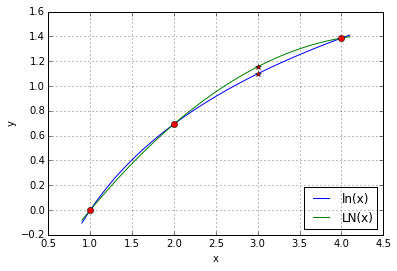

In [11]:
pyl.figure()
pyl.plot(x_pl,ln_pl,x_pl,LN_pl,x,y,'ro', [3.,3.], [ln_3, LN_3],'*')
pyl.xlabel(u"x")
pyl.ylabel(u"y")
pyl.legend(["ln(x)", "LN(x)"], loc=4)
pyl.grid()